# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

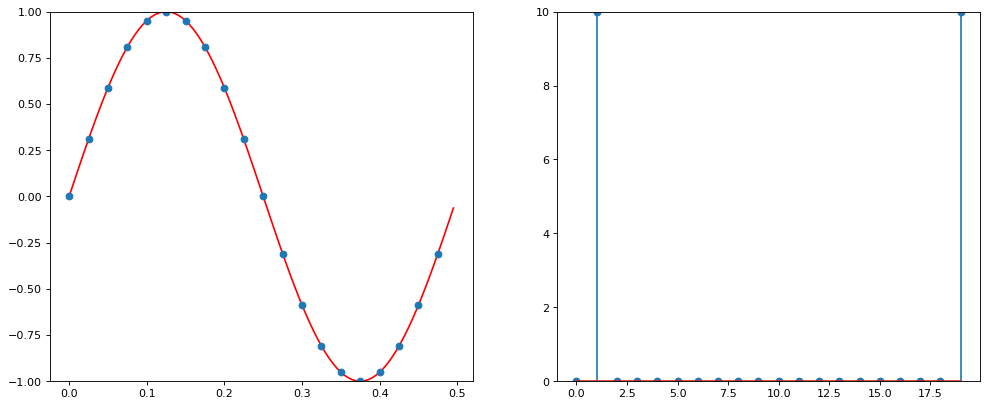

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

A = 1
# Amplituda sygnału

LP = 1 
# Liczba analizowanych pełnych przebiegów sygnału (okresów)
w = 40           
# czśstotliwość probkowania [Hz] sygnału 
#(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

f = 2.0           
# Czestotliwosc sygnalu [Hz]

T = 1.0/f        
# Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

TW = 1.0/w        
# Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW)
# generujemy momenty, w których pobieramy próbki

n = len(t)
    
FUNC = lambda t : A*sin(2*pi*t*f)    
# def. funkcji (tutaj sinus)

signal = FUNC(t)                 
# funkcja sprobkowana

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
base_t = np.arange(0, LP*T, 1.0/200.0)
base_signal = FUNC(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])
## --- 
ax.plot(t, signal, 'o')

signal1 = fft.fft(signal)
# sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)        
# modul sygnalu

freqs = range(int(n))


ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
stem(freqs, signal1, '-*')

show()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

In [2]:
# Zdefiniuj funckję
# A - Amplituda
# w - częśstotliwość probkowania [Hz] sygnału (jak często w ciągu sekundy pobieramy informacje o wartości sygnału)
# f - Czestotliwosc sygnalu [Hz]
# LP - Liczba analizowanych pełnych przebiegów sygnału (okresów)

def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f) 
    signal = FUNC(t) 
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(signal1)        
    freqs = range(int(n))
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')
    show()


UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [3]:
from ipykernel.pylab.backend_inline import flush_figures

def prosta(a=2, b=0):
    x = linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)
    flush_figures()
    
interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))
    

C:\Users\kolec\AppData\Local\Temp\ipykernel_4064\650042938.py:1: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

b) Zmień częstotliwość próbkowania na 50Hz.

In [4]:
# w=50
interact(draw, w=(50))

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=50, description='w',…

<function __main__.draw(A=1, w=40, f=2.0, LP=1)>

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [5]:
# popraw oś OX
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
  
    signal = FUNC(t)
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(signal1)     
    
    # równomiernie rozłożony wektor wartości częstotliwości w Hz od 0Hz do wHz, 
    # n punktów (tyle samo, co liczba próbek sygnału)
    freqs = np.linspace(0, w*(n-1)/n, n) 
    
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    
    show()

interact(draw, f=1.00 ,LP=5)

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=40, description='w',…

<function __main__.draw(A=1, w=40, f=2.0, LP=1)>

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [6]:
# Podpisz osie wykresów
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f) 
    signal = FUNC(t) 
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')  # added
    plt.ylabel('Amplituda')  # added
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(signal1)        
    freqs = np.linspace(0, w*(n-1)/n, n)  
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('FFT(FUNC(x))')  # added
    plt.xlabel('Częstotliwość [Hz]')  # added    
    
    show()

interact(draw, f=1.00 ,LP=5)

interactive(children=(IntSlider(value=1, description='A', max=3, min=-1), IntSlider(value=40, description='w',…

<function __main__.draw(A=1, w=40, f=2.0, LP=1)>

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

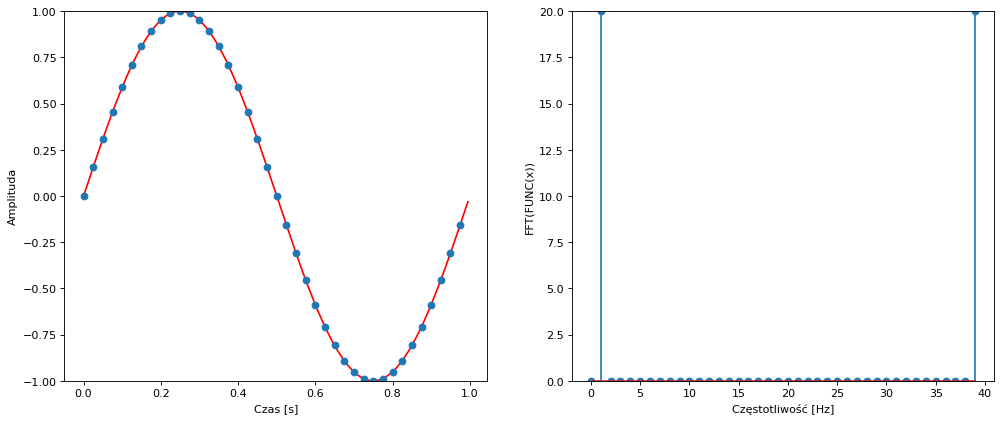

In [7]:
# f=1, A=1, LP=1
draw(f=1, A=1, LP=1)

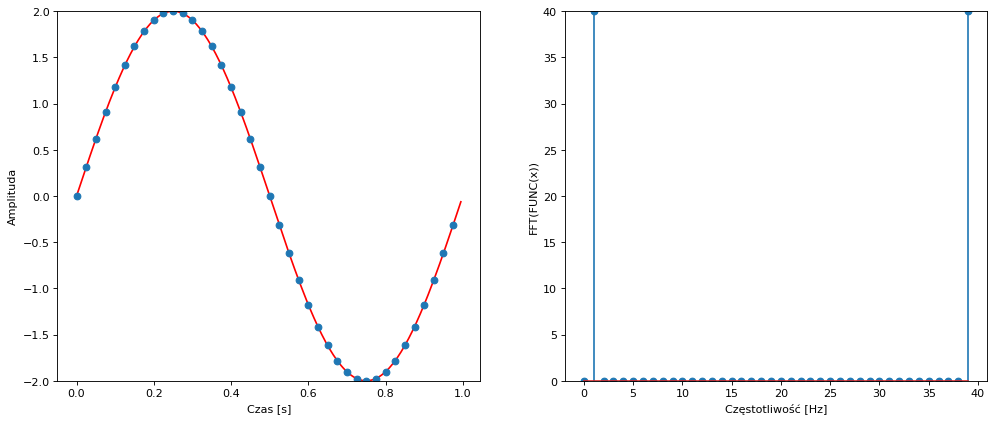

In [8]:
# f=1, A=2, LP=1
draw(f=1, A=2, LP=1)

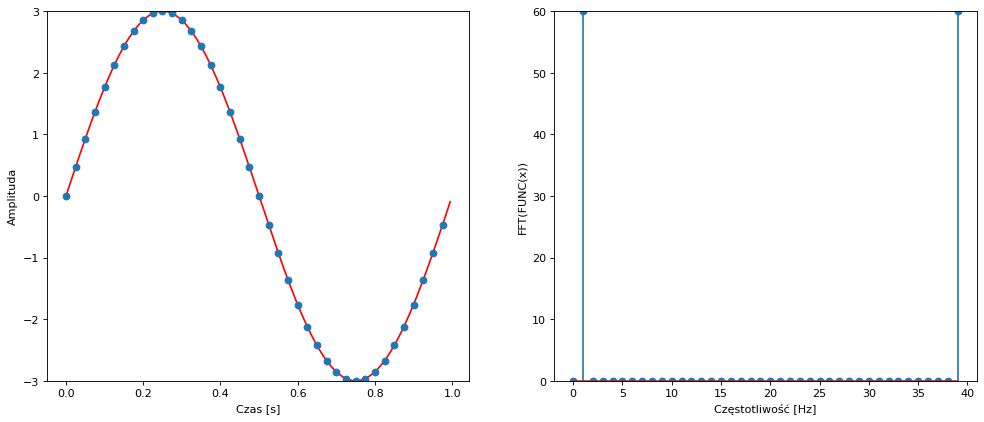

In [9]:
# f=1, A=3, LP=1
draw(f=1, A=3, LP=1)

In [10]:
#Oś OY na wykresie spektrum jest wprost proporcjonalna do amplitudy.

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

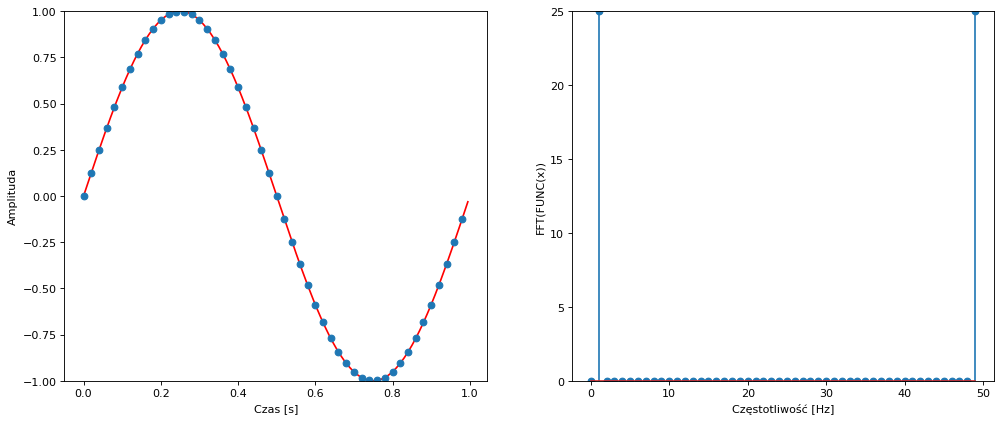

In [11]:
# f=1, w=50, LP=1
draw(f=1,w=50,LP=1)

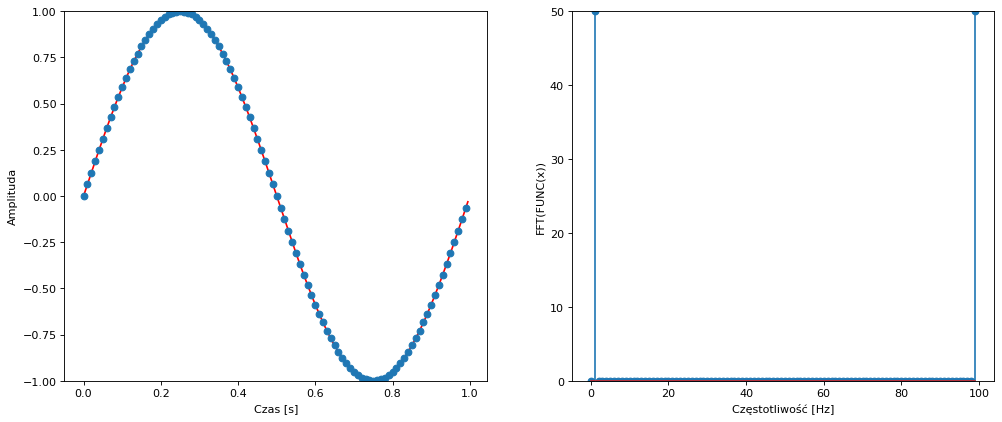

In [12]:
# f=1, w=100, LP=1
draw(f=1,w=100,LP=1)

In [13]:
#Dla pierwszego wykresu jest 50 punktów, dla drugiego 100. Jest to zależne do częstotliwości próbokwania. Liczba punktów jest równa LP*w/f. 
#Maksymalne wartości na osi OY są zależne nie tylko od amplitudy, ale również od częstotliwości próbkowania.

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [14]:
# Podpisz osie wykresów
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f) 
    signal = FUNC(t) 
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)

    #zmiana - widzimy tylko połowę widma, tylko dodatnie częstotliwości.
    signal1 = abs(fft.fft(signal)/(n/2)) 
    
    freqs = np.linspace(0, w*(n-1)/n, n) 
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('Amplituda')
    plt.xlabel('Częstotliwość [Hz]') 
    
    show()

interact(draw, f=5.00 ,LP=5, A=5)

interactive(children=(IntSlider(value=5, description='A', max=15, min=-5), IntSlider(value=40, description='w'…

<function __main__.draw(A=1, w=40, f=2.0, LP=1)>

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

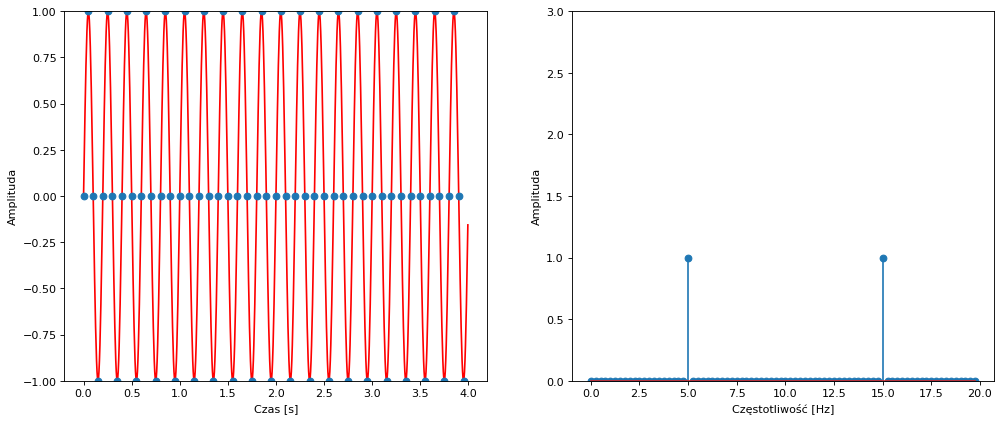

In [15]:
# f=5, w=20, LP=20
draw(f=5, w=20, LP=20)

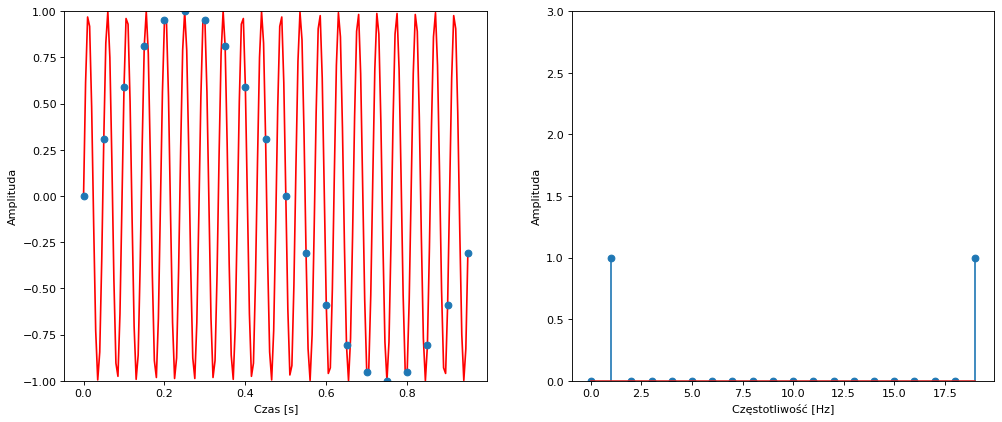

In [16]:
# f=21, w=20, LP=20
draw(f=21, w=20, LP=20)

In [17]:
#Z uwagi na niską częstotliwość próbkowania w porównaniu do częstotliwości funkcji sinusoidalnej, spróbkowane wykresy słabo przedstawiają bazową funkcję.
#Dla drugiego przypadku uzyskano częstotliwość 20Hz, ponieważ dla powyższych danych wykres spróbkowanej funkcji wygląda jak wykres funkcji sinus dla innej częstotliwości.
#Częstoliwość próbkowania jest zbyt mała, aby dokładnie odwzorować częstotliowość 21z.(Zgodnie z twierdzeniem o  próbkowaniu Nyquista, częstotliwość próbkowania 
#powinna być dwa razy większa niż częstotliwość syganłu.
#Zgodnie z twierdzeniem Nyquista-Shannona, częstotliwość próbkowania powinna być co najmniej dwa razy większa niż najwyższa częstotliwość w sygnale, aby zapobiec aliasingowi. 
#W opisanym przypadku zastosowanie wyższej częstotliwości próbkowania, np. co najmniej 42 Hz, pozwoliłoby uniknąć tego problemu i wiernie odwzorować sygnał.

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

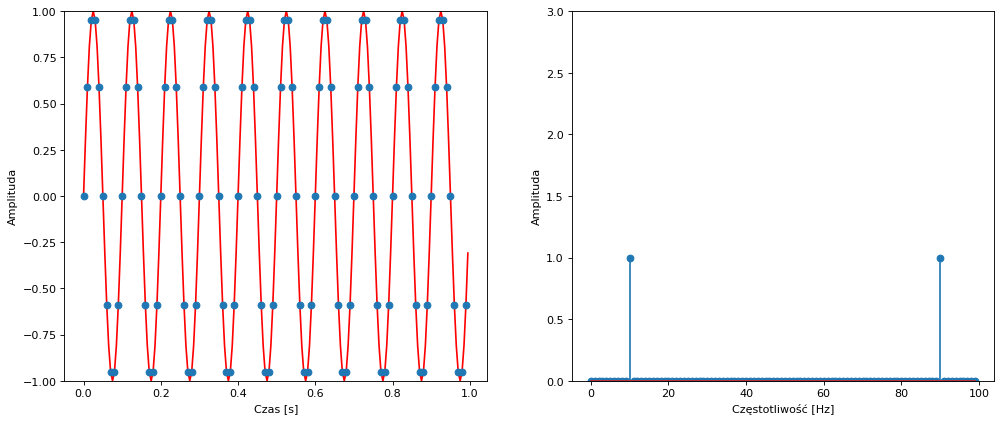

In [18]:
# f=10, w=100, A=1, LP=10
draw(A=1,w=100,f=10,LP=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

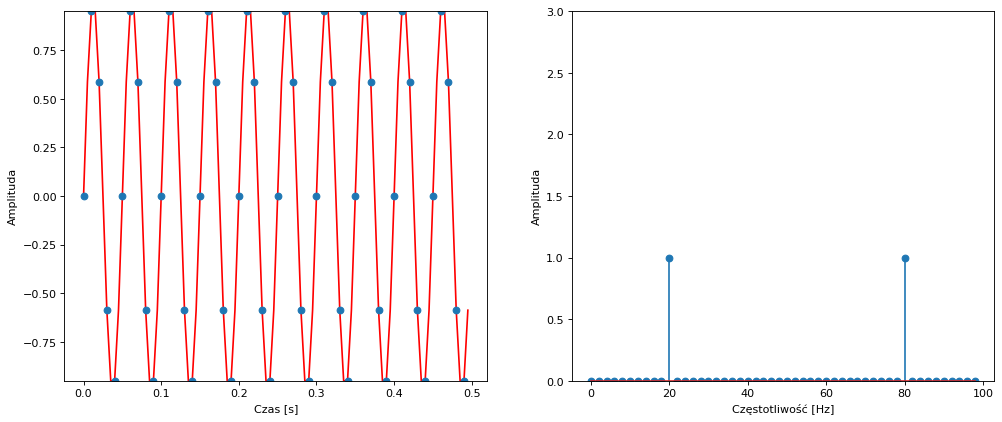

In [19]:
# f=20, w=100, A=1, LP=10
draw(A=1,w=100,f=20,LP=10)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie; dlaczego?)

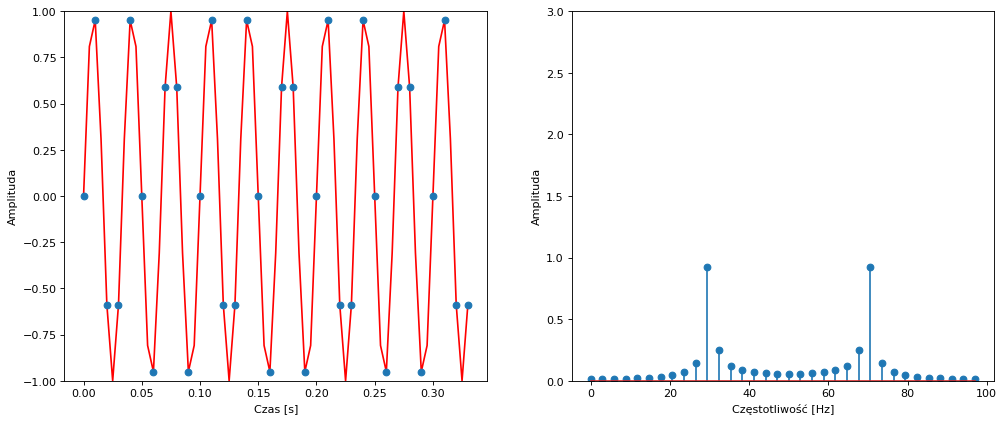

In [20]:
# f=30, w=100, A=1, LP=10
draw(A=1,w=100,f=30,LP=10)
# Słupki nie wyglądają idealnie, ponieważ przy zastosowanej częstotliwości próbkowania i częstotliwości sygnału, 
# próbki nie zawsze trafiają w punkty odpowiadające wartościom maksymalnym funkcji (amplitudom). 
# W efekcie wykres spróbkowanych wartości nie odzwierciedla dokładnie kształtu idealnego sinusa.

iv) $sin(2*pi*t*f)$, $f=40Hz$

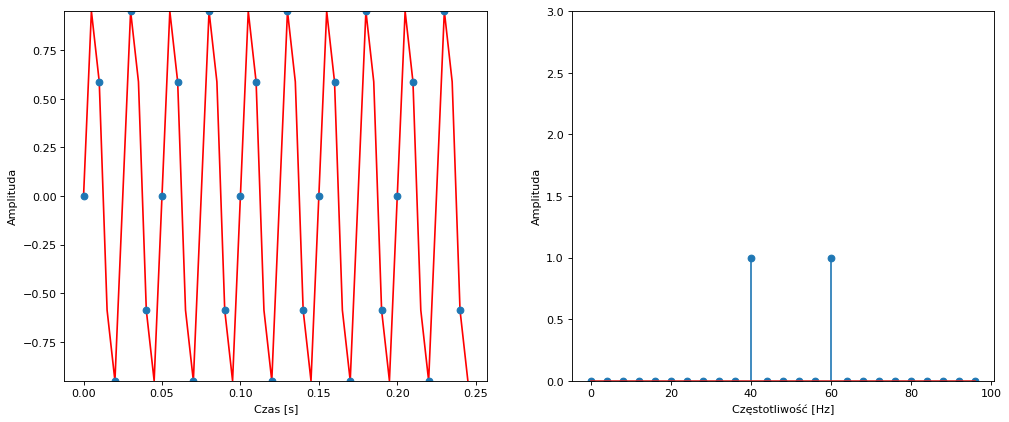

In [21]:
# f=40, w=100, A=1, LP=10
draw(A=1,w=100,f=40,LP=10)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróć uwagę na skalę wykresów.

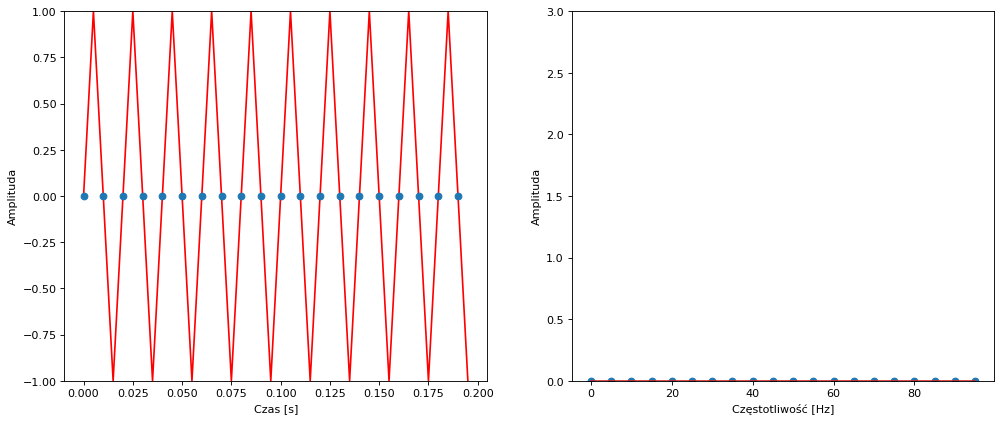

In [22]:
# f=50, w=100, A=1, LP=10
draw(A=1,w=100,f=50,LP=10)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

In [23]:
#Twierdzenie Kotielnikowa-Shannona, zwane także twierdzeniem o próbkowaniu, mówi, że sygnał ciągły można dokładnie odtworzyć z jego próbek, 
#jeśli próbkowanie odbywa się z częstotliwością co najmniej dwa razy większą od najwyższej częstotliwości obecnej w sygnale. 
#Tę minimalną częstotliwość próbkowania nazywamy częstotliwością Nyquista.

# Zadanie 3

Poniższe przypadki skłądają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

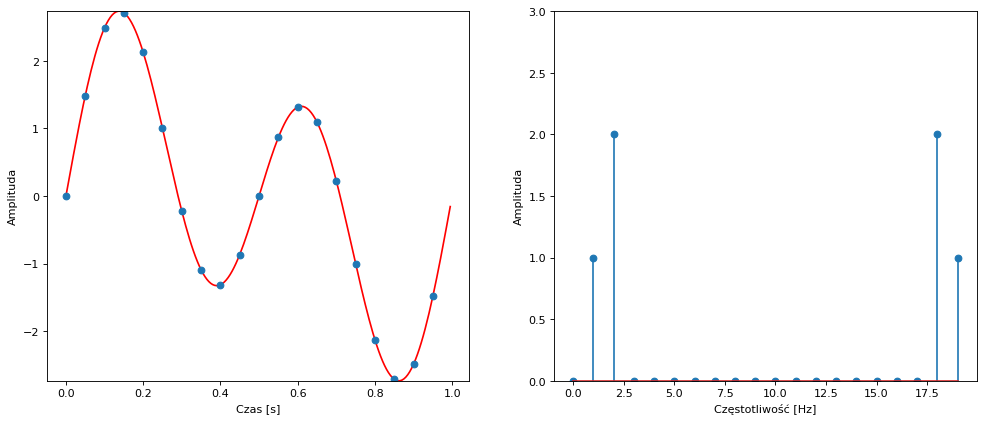

In [24]:
# Wyrysuj sygnał
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : A*sin(2*pi*t*f) + 2*A*sin(4*pi*t*f)
    signal = FUNC(t) 
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(fft.fft(signal)/(n/2)) 
    
    freqs = np.linspace(0, w*(n-1)/n, n)  
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('Amplituda')
    plt.xlabel('Częstotliwość [Hz]') 
    
    show()
    
draw(A=1,w=20,f=1,LP=1)  

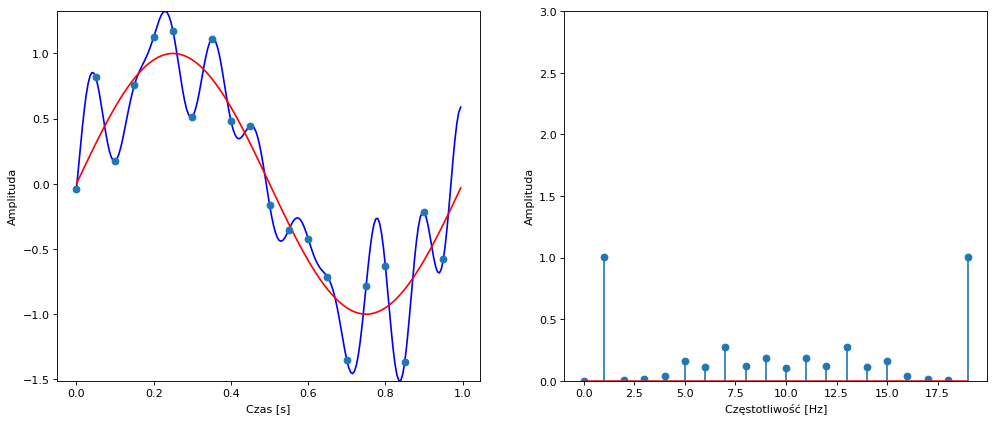

In [25]:
# Wyrysuj sygnał
def draw_noise(A=1,w=20,f=1.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    
    FUNC = lambda t : A*sin(2*pi*t*f)
    signal = FUNC(t) 

    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    
    # Dodanie szumu
    for _ in range(100):
        A_noise = np.random.uniform(0.02, 0.08)  # Amplituda szumu
        f_noise = np.random.uniform(5, 10)      # Częstotliwość szumu
        phi_noise = np.random.uniform(0, 2 * np.pi)  # Faza szumu
        
        # Funkcja szumu
        noise_func = lambda t: A_noise * sin(2 * pi * t * f_noise + phi_noise)
        noise = noise_func(t)
        signal += noise
        
        # Dodanie szumu do sygnału wygładzonego
        noise_smooth = noise_func(base_t)
        base_signal += noise_smooth 
 
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='blue', label='Sygnał z szumem')
    ax.plot(base_t, FUNC(base_t), linestyle='-', color='red', label='Sygnał bazowy')
    
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    ax.plot(t, signal, 'o')
    
    signal1 = abs(fft.fft(signal)/(n/2)) 
    freqs = np.linspace(0, w*(n-1)/n, n) 
    
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('Amplituda')
    plt.xlabel('Częstotliwość [Hz]') 
    
    show()
    

draw_noise(A=1,w=20,f=1.0,LP=1)

In [26]:
# Tak, można odnaleźć przebieg funkcji bazowej. Szum to wartości częstotliwości z zakresu (5, 17)Hz.

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na “symetrię” spektrum).

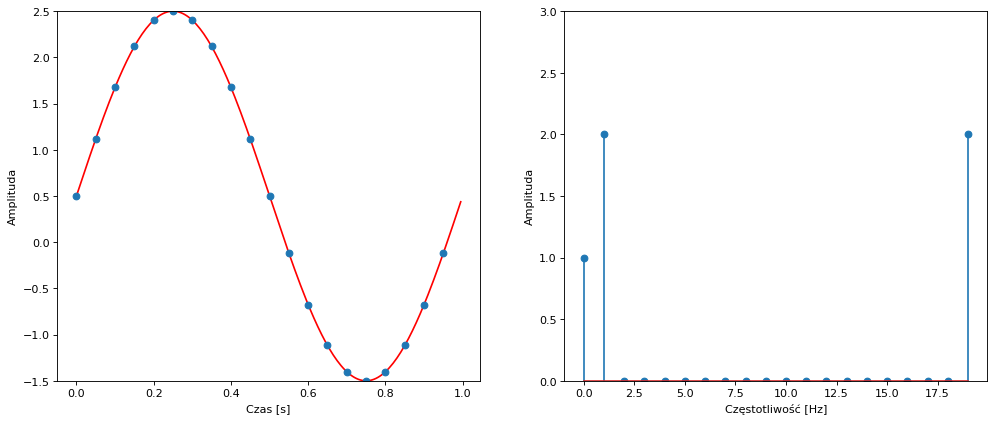

In [27]:
# Wyrysuj sygnał
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : 0.5 + 2*A*sin(2*pi*t*f)
    signal = FUNC(t) 
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(fft.fft(signal)/(n/2)) 
    
    freqs = np.linspace(0, w*(n-1)/n, n) 
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('Amplituda')
    plt.xlabel('Częstotliwość [Hz]') 
    
    show()
    
draw(A=1,w=20,f=1,LP=1)  

In [28]:
# Amplituda zerowego prążka wynosi 0.5 i jest prawidłowa, ponieważ odzwierciedla wartość średnią sygnału z części stałej i  jest to 
# przesunięcie na osi OY.
# Symetria widma dla sinusoidalnej części sygnału nie wpływa na prążek zerowy.

e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

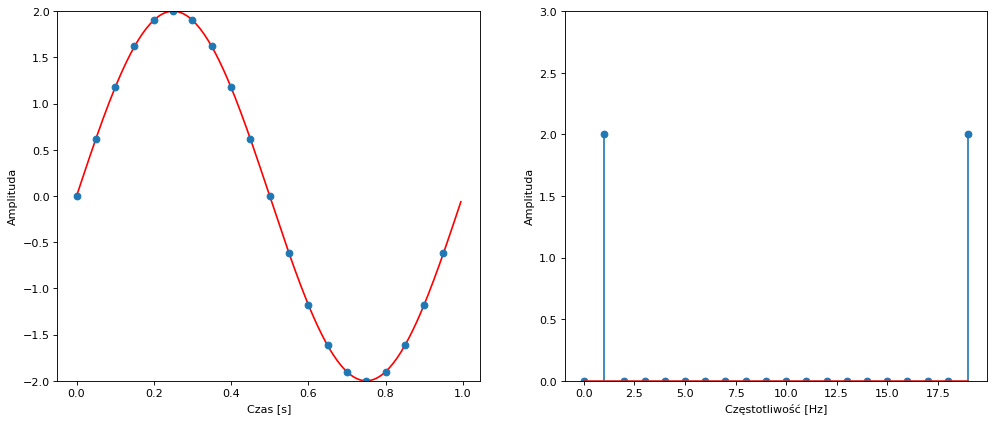

In [29]:
# faza = 0
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : 2*A*sin(2*pi*t*f)
    signal = FUNC(t) 
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(fft.fft(signal)/(n/2)) 
    
    freqs = np.linspace(0, w*(n-1)/n, n)  
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('Amplituda')
    plt.xlabel('Częstotliwość [Hz]') 
    
    show()
    
draw(A=1,w=20,f=1,LP=1)  

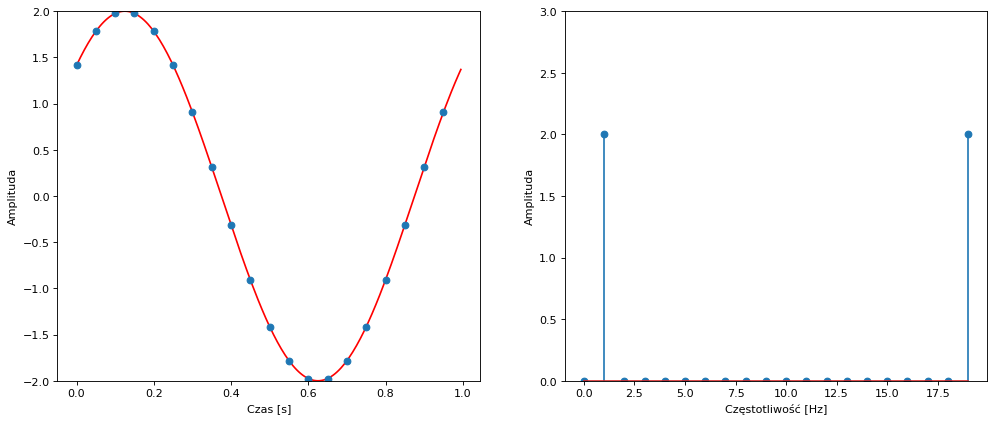

In [30]:
# faza = pi/4
def draw(A=1,w=40,f=2.0,LP=1):
    T = 1.0/f
    TW = 1.0/w 
    t = np.arange(0, LP*T, TW)
    n = len(t)
    FUNC = lambda t : 2*A*sin(2*pi*t*f + pi/4)
    signal = FUNC(t)
    
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    ax.plot(t, signal, 'o')
    
    signal1 = fft.fft(signal)
    signal1 = abs(fft.fft(signal)/(n/2)) 
    
    freqs = np.linspace(0, w*(n-1)/n, n) 
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.stem(freqs, signal1, '-*')
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    plt.ylabel('Amplituda')
    plt.xlabel('Częstotliwość [Hz]') 
    
    show()
    
draw(A=1,w=20,f=1,LP=1)  

In [31]:
f = 1
w = 20
LP = 1
T = 1/f
TW = 1/w
t = np.arange(0, LP*T, TW)
n = len(t)

func_1=lambda t: np.sin(2*np.pi*t*f)
signal_1 = func_1(t)
signal_f1 = np.fft.fft(signal_1)
print(np.angle(signal_f1, deg=True))

func_2=lambda t: np.sin(2*np.pi*t*f + np.pi/4)
signal_2 = func_2(t)
signal_f2 = np.fft.fft(signal_2)
print(np.angle(signal_f2, deg=True))

[ 180.          -90.          135.70772846 -113.03788129  151.50677798
 -101.29821713  -12.22500628   67.53139063   28.65155221  143.16816131
  180.         -125.25550211  -28.65155221  -36.66669068   12.22500628
  102.32592855 -151.50677798  106.75370281 -135.70772846   90.        ]
[ 180.          -45.          110.93769821 -153.43494882 -169.48852767
  -91.91498633   -6.35494711   45.           48.92993357  129.77088902
  180.         -125.53767779  -48.92993357   11.35029769    6.35494711
   96.34019175  169.48852767 -166.22947246 -110.93769821   45.        ]


In [32]:
# Informacja o fazie nie zniknęła. 
# Na wykresie sygnału w dziedzinie czasu widać przesunięcie fazowe (wykonanie funkcji angle(), 
# również wskazuje na przesunięcie w fazie (inne wartości)).

# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [33]:
# wygeneruj wektor x
x = np.random.random(10)
print(x)

[0.13067279 0.46598348 0.61318375 0.62760899 0.12831741 0.36167886
 0.53080864 0.05403102 0.61649682 0.50453002]


In [34]:
# oblicz fft z x
x_fft = np.fft.fft(x)
x_fft

array([ 4.03331179+0.j        ,  0.19026551-0.28311865j,
       -0.55035286-0.00704392j, -0.77060422+0.75464514j,
       -0.23542391-0.7625773j ,  0.00564704+0.j        ,
       -0.23542391+0.7625773j , -0.77060422-0.75464514j,
       -0.55035286+0.00704392j,  0.19026551+0.28311865j])

In [35]:
# oblicz ifft
x_ifft = np.fft.ifft(x_fft)
x_ifft

array([0.13067279-5.55111512e-18j, 0.46598348+0.00000000e+00j,
       0.61318375-1.71538891e-18j, 0.62760899+0.00000000e+00j,
       0.12831741+4.49094647e-18j, 0.36167886+0.00000000e+00j,
       0.53080864+4.49094647e-18j, 0.05403102+0.00000000e+00j,
       0.61649682-1.71538891e-18j, 0.50453002+0.00000000e+00j])

In [36]:
#porownaj x z ifft(fft(x)), wystarczy print
print(x)
print(x_ifft)

[0.13067279 0.46598348 0.61318375 0.62760899 0.12831741 0.36167886
 0.53080864 0.05403102 0.61649682 0.50453002]
[0.13067279-5.55111512e-18j 0.46598348+0.00000000e+00j
 0.61318375-1.71538891e-18j 0.62760899+0.00000000e+00j
 0.12831741+4.49094647e-18j 0.36167886+0.00000000e+00j
 0.53080864+4.49094647e-18j 0.05403102+0.00000000e+00j
 0.61649682-1.71538891e-18j 0.50453002+0.00000000e+00j]


In [37]:
x - np.real(x_ifft)

array([ 0.00000000e+00, -5.55111512e-17, -1.11022302e-16, -1.11022302e-16,
        2.77555756e-17, -1.11022302e-16,  1.11022302e-16, -4.85722573e-17,
        0.00000000e+00, -1.11022302e-16])

In [38]:
# Żadna informacja nie została stracona.